In [1]:
import numpy as np
import os

from numpy.linalg.linalg import LinAlgError
from plyfile import PlyData, PlyElement
import cv2
import yaml
from collections import namedtuple
import imageio
from tqdm import tqdm
import logging
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
color_palette = {
    0: {"color": [0, 0, 0],  "name": "void"},
    1: {"color": [108, 64, 20],   "name": "dirt"},
    3: {"color": [0, 102, 0],   "name": "grass"},
    4: {"color": [0, 255, 0],  "name": "tree"},
    5: {"color": [0, 153, 153],  "name": "pole"},
    6: {"color": [0, 128, 255],  "name": "water"},
    7: {"color": [0, 0, 255],  "name": "sky"},
    8: {"color": [255, 255, 0],  "name": "vehicle"},
    9: {"color": [255, 0, 127],  "name": "object"},
    10: {"color": [64, 64, 64],  "name": "asphalt"},
    12: {"color": [255, 0, 0],  "name": "building"},
    15: {"color": [102, 0, 0],  "name": "log"},
    17: {"color": [204, 153, 255],  "name": "person"},
    18: {"color": [102, 0, 204],  "name": "fence"},
    19: {"color": [255, 153, 204],  "name": "bush"},
    23: {"color": [170, 170, 170],  "name": "concrete"},
    27: {"color": [41, 121, 255],  "name": "barrier"},
    31: {"color": [134, 255, 239],  "name": "puddle"},
    33: {"color": [99, 66, 34],  "name": "mud"},
    34: {"color": [110, 22, 138],  "name": "rubble"}
}

In [3]:
def convert_label(label, inverse=False):
    temp = label.copy()
    if inverse:
        for v, k in color_palette.items():
            label[temp == k["color"]] = v
    else:
        label = np.zeros(temp.shape+(3,))
        for k, v in  color_palette.items():
            label[temp == k, :] = v["color"]
    return label

In [4]:
def open_img_label(img_label_path,label_size=None):
    pred = Image.open(img_label_path)
    if label_size is not None:  
        if label_size[0] != pred.size[0] or label_size[1] != pred.size[1]:
            pred = pred.resize((label_size[1],label_size[0]),Image.NEAREST)
            pred = np.array(pred)[:,:,0]
    pred = np.array(pred)
    return pred

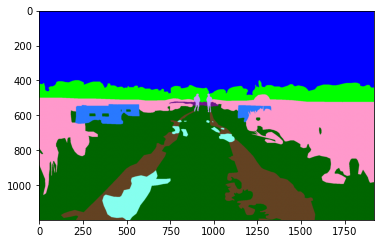

In [5]:
gt_label_path = '/home/maskjp/Datasets/Rellis-3D/00003/pylon_camera_node_label_id/frame000000-1581624075_250.png'
gt_label_id = open_img_label(gt_label_path)
label_size = gt_label_id.shape
gt_label_color = convert_label(gt_label_id,False)/255
plt.imshow(gt_label_color)

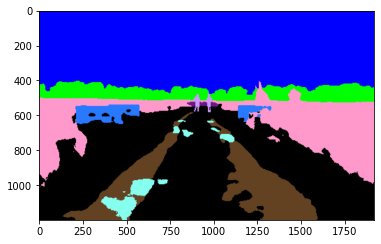

In [9]:
pred_label_path = '/home/maskjp/Datasets/Rellis-3D/hrnet/00003/pylon_camera_node_label_id/frame000000-1581624075_250.png'
pred_label_id = open_img_label(pred_label_path,label_size)
pred_label_color = convert_label(pred_label_id,False)/255
plt.imshow(pred_label_color)